In [2]:
%load_ext autoreload
%autoreload 2

import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets import IamDataset
from text_recognizer.datasets import IamParagraphsDataset



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dataset = IamDataset()
print(dataset)

IAM Dataset
Number of forms: 1539



In [45]:
transform = [{"type": "ToTensor", "args": None}, {"type": "RandomAffine", "args": {"degrees": [-10, 10], "scale": [0.8, 1.1]}}, {"type": "RandomHorizontalFlip", "args": {"p": 0.1}}]
ttransform =[{"type": "Unsqueeze", "args": None}, {"type": "RandomAffine", "args": {"degrees": [-10, 10], "scale": [0.8, 1.1]}}, {"type": "RandomHorizontalFlip", "args": {"p": 0.1}}, {"type": "Squeeze", "args": None}]

In [46]:
paragraphs_dataset = IamParagraphsDataset(True, transform=transform, target_transform=ttransform)
paragraphs_dataset.load_or_generate_data()
print(paragraphs_dataset)

2020-12-05 22:39:25.402 | INFO     | text_recognizer.datasets.iam_paragraphs_dataset:_load_iam_paragraphs:250 - Loading IAM paragraph crops and ground truth from image files...


IAM Paragraph Dataset
Num classes: 3
Data: (1229, 256, 256)
Targets: (1229, 256, 256)



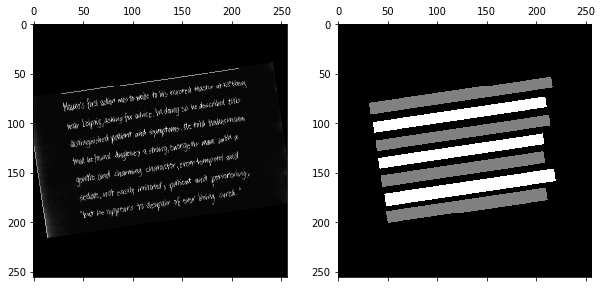

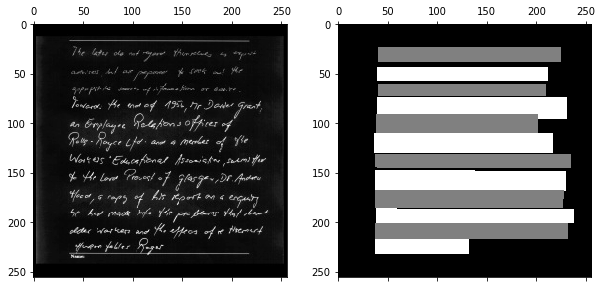

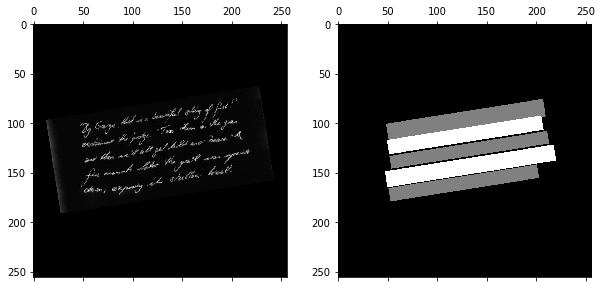

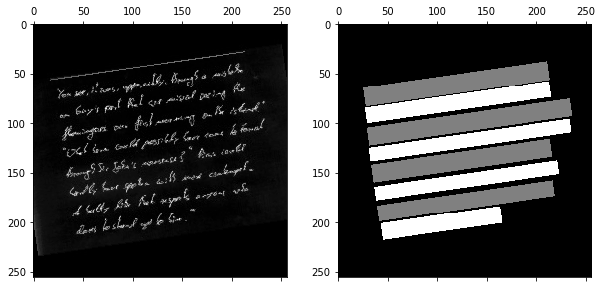

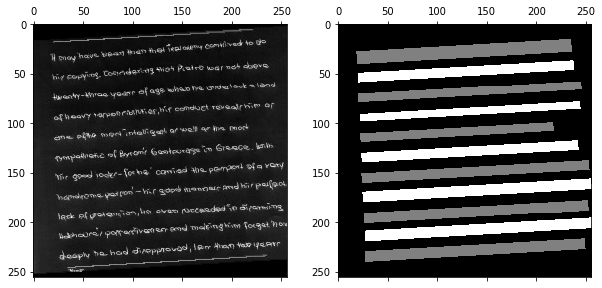

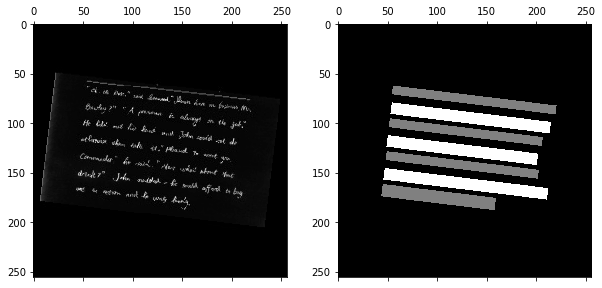

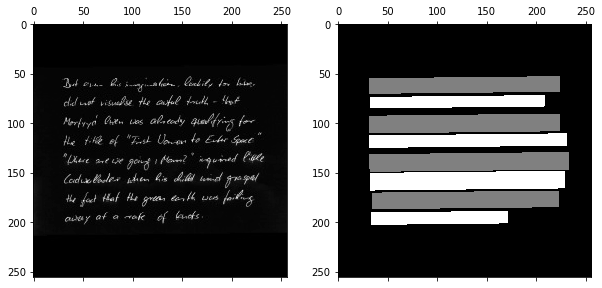

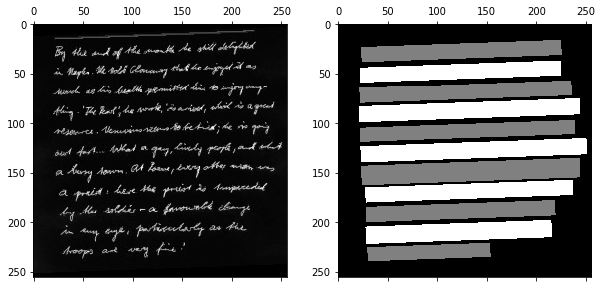

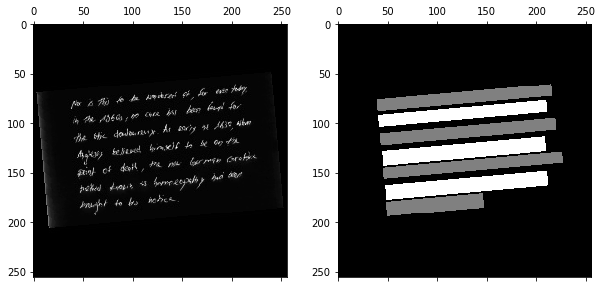

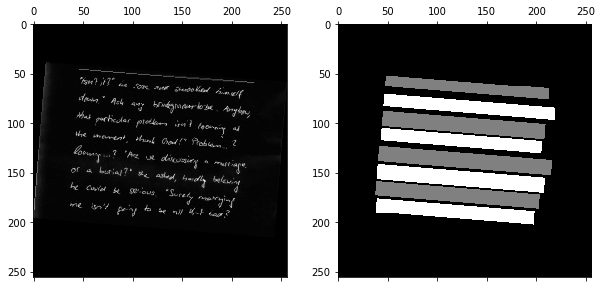

In [48]:
for ind in range(10):
    x, y = paragraphs_dataset[ind]
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax1.matshow(x.squeeze(0), cmap='gray')
    ax2 = fig.add_subplot(122)
    ax2.matshow(y.squeeze(0), cmap='gray')